# Credit Card Fraud Detection with XGBoost – 96.6% AUC & 86% F1-Score on Imbalanced Data

In this notebook, we address the **credit card fraud detection** problem using **XGBoost**, applied on a **highly imbalanced dataset** where fraud represents only 0.17% of transactions.

To handle the imbalance, we used the `scale_pos_weight` parameter to give more importance to the minority (fraud) class. We also applied **robust scaling**, removed low-correlation features, and performed stratified train-test split.

### 🔍 Results:

* **AUC Score**: `96.6%`
* **F1-Score**: `86%`
* **Precision (fraud)**: `90%`
* **Recall (fraud)**: `82%`

These results show that XGBoost, with the right handling of imbalance, can effectively detect rare fraudulent transactions without needing resampling techniques.

---

### 📌 **اكتشاف الاحتيال باستخدام XGBoost – بدقة AUC 96.6% و F1-Score بنسبة 86%**

في هذا الدفتر، نتناول مشكلة **اكتشاف الاحتيال في بطاقات الائتمان** باستخدام خوارزمية **XGBoost**، على بيانات غير متوازنة بشدة حيث تمثل المعاملات الاحتيالية فقط 0.17% من البيانات.

للتعامل مع هذا التفاوت، استخدمنا معامل `scale_pos_weight` لإعطاء أهمية أكبر للفئة الأقل (الاحتيال). كما قمنا بعملية **تحجيم للخصائص**، وحذفنا الخصائص ضعيفة الارتباط، واعتمدنا على تقسيم طبقي للبيانات بين التدريب والاختبار.

### 🔍 النتائج:

* **AUC Score**: `96.6%`
* **F1-Score**: `86%`
* **الدقة (للاحتيال)**: `90%`
* **الاسترجاع (للاحتيال)**: `82%`

تُظهر هذه النتائج أن XGBoost، عند ضبطه بشكل مناسب، يمكنه اكتشاف الحالات الاحتيالية النادرة بكفاءة دون الحاجة إلى تقنيات إعادة التوزيع (Oversampling أو Undersampling).

## Import Libraries
 استيراد المكتبات اللازمة

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

## Load and Process Data
 تحميل البيانات ومعالجتها

In [2]:
df = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.175161e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.369007e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.094852e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,1.021879e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.500885e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.620335e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.149614e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.426963e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.isnull().sum().max() == 0

True

In [6]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

## Feature Scaling
 تجحيم الخصائص

In [7]:
from sklearn.preprocessing import RobustScaler

rob_scaler = RobustScaler()
df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))
df.drop(['Time','Amount'], axis=1, inplace=True)
df = df[['scaled_amount', 'scaled_time'] + [col for col in df.columns if col not in ['scaled_amount', 'scaled_time']]]

##  Correlation with Class


<Axes: >

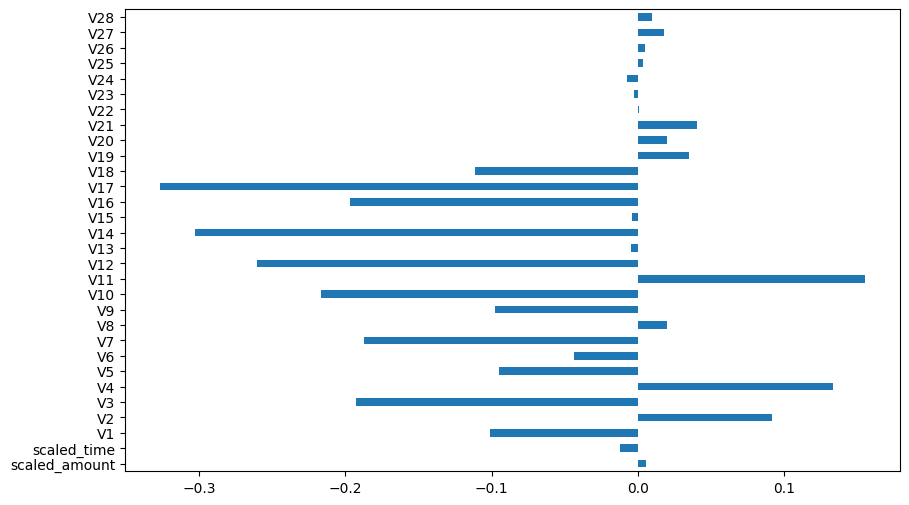

In [8]:
# الارتباط مع الفئة المستهدفة
corr_values = df.corr()['Class'].drop('Class')
corr_values.plot(kind='barh', figsize=(10, 6))

## Feature Selection

In [9]:
# اختيار الخصائص
X = df.drop(['V22','V23','V25', 'Class'], axis=1)
y = df['Class']

## Train-Test Split

In [10]:
# تقسيم البيانات إلى تدريب واختبار
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## XGBoost Model

In [11]:
# XGBoost Model with scale_pos_weight

# حساب نسبة التوازن بين الفئتين
n_negative = sum(df['Class'] == 0)
n_positive = sum(df['Class'] == 1)
scale_pos_weight = n_negative / n_positive

# بناء وتدريب نموذج XGBoost مع ضبط scale_pos_weight
xgb_clf = XGBClassifier(
    objective='binary:logistic',
    eval_metric='auc',
    use_label_encoder=False,
    random_state=42,
    scale_pos_weight=scale_pos_weight
)
xgb_clf.fit(X_train, y_train)




XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

## Model Evaluation
تقييم النموذج

In [12]:
y_pred_xgb = xgb_clf.predict(X_test)
y_proba_xgb = xgb_clf.predict_proba(X_test)[:, 1]

print("Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_xgb))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.90      0.82      0.86        98

    accuracy                           1.00     56962
   macro avg       0.95      0.91      0.93     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
 [[56855     9]
 [   18    80]]
ROC AUC Score: 0.9664624977030767
